# Curva de aprendizado

As curvas de aprendizado podem ser uma ótima ferramenta para avaliar o comportamento do modelo quando modificamos sua complexidade. Em um modelo de árvore de decisão a complexidade pode ser modificada quando alteramos a profundidade da árovre.

Vamos utilizar uma base de dados de teste para treinar um modelo de árvore e ver o comportamento do modelo quando alteramos a sua profundidade.

Além disso, a curva de aprendizado é uma técnica para verificar como o modelo se comporta com os dados de treino e teste. Ela é uma ótima ferramenta para verificar se o modelo apresenta **overfitting**. Em geral, caso o modelo tenha um ótimo desempenho nos dados de treino, mas um baixo desempenho nos dados de teste, é um indício de overfitting.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
path = '/home/diegords/Documentos/curva_de_aprendizado/data/hearing_test.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
len(df)

5000

Dividindo os dados em treino e teste para podermos treinar o modelo

In [5]:
columns_of_df = df.columns

x = df[[column for column in columns_of_df if column != 'test_result']]
y = df['test_result']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

# Curva de aprendizado

A curva será gerada através do treinamento do modelo de árvore de decisão e vamos verificar qual o comportamento do modelo nos dados de treino e teste quando alteramos a profundidade da árvore, designada pela variável 'max_depth'.

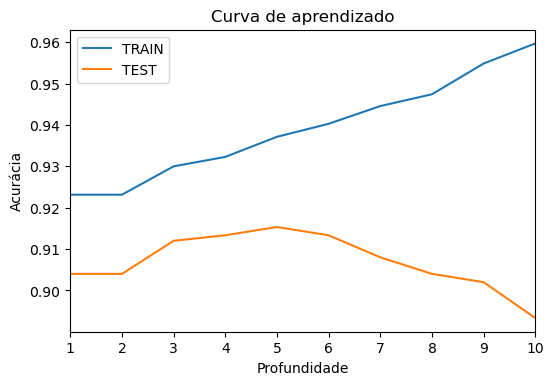

In [21]:
score_train_list = []
score_test_list = []
profundidade = range(1, 11)

for i in profundidade:

    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    score_train = metrics.accuracy_score(y_pred_train, y_train)
    score_test = metrics.accuracy_score(y_pred_test, y_test)

    score_train_list.append(score_train)
    score_test_list.append(score_test)

plt.figure(dpi=100)
plt.plot(profundidade, score_train_list, label='TRAIN')
plt.plot(profundidade, score_test_list, label='TEST')
plt.title('Curva de aprendizado')
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')
plt.xlim(1, 10)
plt.legend()
plt.savefig('/home/diegords/Documentos/curva_de_aprendizado/curva_de_aprendizado.png')
plt.show()

É notável que a medida que aumentamos a profundidade da árvore o desempenho nos dados de treino e teste seguem um padrão; entretanto, próximo ao valor de profundidade = 5, o conjunto de treinamento começa a aumentar considerávelmente sua acurácia e o conjunto de testes começa a perder acurácia. Neste ponto, temos um limite no qual podemos considerar a modificação da profundidade da árvore, pois, posterior a esse valor, temos claramente um sinal de overfitting.